In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt 
from scipy.stats import norm, binom, uniform
from scipy.special import logsumexp

%run tools.py

# Exercise 1

In this exercice we are going to analyse the dipendence between height and weight in the *Howell* dataset (from lesson 5), and consider also individuals aged less than 18 years old.

**1) Recover the *Howell* dataset, and plot weight (centered) vs height.**

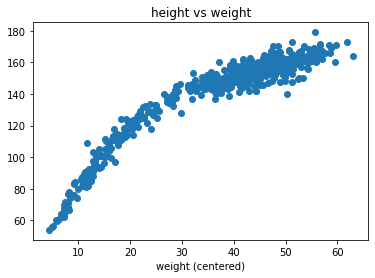

In [2]:
data = pd.read_csv('Howell1.txt', sep = ';')

mean_weight = np.mean(data.weight)

data.weight = data.weight - mean_weight

plt.scatter(data.weight + mean_weight, data.height)
plt.title('height vs weight')
plt.xlabel('height (cm)')
plt.xlabel('weight (centered)')
plt.show()

**2) Investigate the relationship between weight and height. 
Which hypothesis is better supported by the data?**

**- the relationship is linear**

**- the relationship is quadratic**

**Plot the average results.**

      fun: 2000.744406951513
 hess_inv: array([[ 0.11108718, -0.00792001,  0.04226337],
       [-0.00792001,  0.00149695, -0.00211641],
       [ 0.04226337, -0.00211641,  0.02029508]])
      jac: array([-1.52587891e-05,  1.52587891e-05,  1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 104
      nit: 21
     njev: 26
   status: 2
  success: False
        x: array([138.27953738,   1.76428348,   9.34589565])


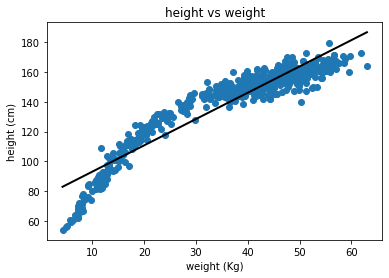

In [3]:
#linear model

expr_linear = 'height ~   weight'
# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 178
prior_a_sigma = 20
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 10
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

sigma_inf = 0
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b, prior_sigma]

solution_regression_linear = laplace_solution_regression(expr_linear, data, likelihood, priors)
# Computing posterior samples
posterior_samples_linear = multivariate_normal.rvs(solution_regression_linear[0], solution_regression_linear[1], size = 1000)

# Computing posterior mean and std
# sd
post_sd = np.std(posterior_samples_linear, axis = 0)
# mean
post_mean = np.mean(posterior_samples_linear, axis = 0)

# Plot the average results 
x_range = np.linspace(min(data.weight), max(data.weight))
mean_prediction = post_mean[0] + post_mean[1] * x_range

plt.plot(x_range + mean_weight , mean_prediction, lw = 2, color = 'black')
plt.scatter(data.weight + mean_weight, data.height)
plt.title('height vs weight')
plt.ylabel('height (cm)')
plt.xlabel('weight (Kg)')

plt.show()

/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 1738.9532047374646
 hess_inv: array([[ 1.17434189e-04, -2.93423363e-06, -2.97624410e-07,
        -5.29165263e-05],
       [-2.93423363e-06,  2.95431675e-04,  5.37711231e-06,
        -1.36813089e-04],
       [-2.97624410e-07,  5.37711231e-06,  6.57422506e-07,
        -3.52055382e-06],
       [-5.29165263e-05, -1.36813089e-04, -3.52055382e-06,
         3.96339822e-03]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -4.57763672e-05,  1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 295
      nit: 40
     njev: 58
   status: 2
  success: False
        x: array([ 1.46671413e+02,  1.45466313e+00, -3.88570026e-02,  5.74977595e+00])


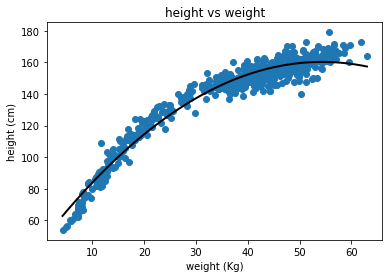

In [4]:
# Quadratic model

data['weight2'] = data.weight * data.weight

expr_quadratic = 'height ~   weight + weight2'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 178
prior_a_sigma = 20
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 10
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

prior_b2_mean = 0
prior_b2_sigma = 10
prior_b2 = ['gaussian', [prior_b_mean, prior_b_sigma]]

sigma_inf = 0
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b, prior_b2, prior_sigma]


solution_regression_quadratic = laplace_solution_regression(expr_quadratic, data, likelihood, priors)

# Computing posterior samples
posterior_samples_quadratic = multivariate_normal.rvs(solution_regression_quadratic[0], solution_regression_quadratic[1], size = 1000)

# Computing posterior mean and std
# sd
post_sd = np.std(posterior_samples_quadratic, axis = 0)
# mean
post_mean = np.mean(posterior_samples_quadratic, axis = 0)

#plotting the average results 
x_range = np.linspace(min(data.weight), max(data.weight))
mean_prediction = post_mean[0] + post_mean[1] * x_range + post_mean[2] * x_range**2

plt.plot(x_range + mean_weight , mean_prediction, lw = 2, color = 'black')
plt.scatter(data.weight + mean_weight, data.height)
plt.title('height vs weight')
plt.ylabel('height (cm)')
plt.xlabel('weight (Kg)')

plt.show()

**3) Compute a 95\% confidence interval for the parameters of the retained model.**

In [5]:
post_quantiles = np.quantile(posterior_samples_quadratic, q = [0.025, 0.975], axis = 0)
post_sd = np.std(posterior_samples_quadratic, axis = 0)
post_mean = np.mean(posterior_samples_quadratic, axis = 0)

summary_stats = [post_mean, post_sd, post_quantiles[0,:],post_quantiles[1,:]]

summary = pd.DataFrame(summary_stats).transpose()
summary.columns = ['mean', 'SD', '2.5%', '97.5%']
summary.rename(index={0:'a',1:'b', 2:'b2', 3:'sigma'}, inplace=True)
print(summary)

             mean        SD        2.5%       97.5%
a      146.671194  0.010802  146.651211  146.691436
b        1.455213  0.017353    1.423231    1.488789
b2      -0.038852  0.000849   -0.040542   -0.037292
sigma    5.753668  0.059223    5.634901    5.862636


**4) Compute a 90\% confidence interval for the prediction of the mean height for a person of 50 kg, and plot his predicted height distribution.**

                     mean        SD          5%         95%
Predictions:   159.566258  0.353706  158.981621  160.166421


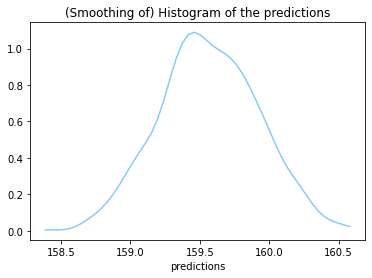

In [6]:
x = 50
x_center = x - mean_weight

#Prediction
prediction = []
for i in range(1000):
    prediction.append(posterior_samples_quadratic[i,0] + posterior_samples_quadratic[i,1] * x_center + posterior_samples_quadratic[i,2] * x_center**2)

#Confidence interval
pred_quantiles = np.quantile(prediction, q = [0.05, 0.95], axis = 0)
pred_sd = np.std(prediction, axis = 0)
pred_mean = np.mean(prediction, axis = 0)

summary_stats = [pred_mean, pred_sd, pred_quantiles[0],pred_quantiles[1]]

summary = pd.DataFrame(summary_stats).transpose()
summary.columns = ['mean', 'SD', '5%', '95%']
summary.rename(index={0:'Predictions: '}, inplace=True)
print(summary)

#Plot
data_density = gaussian_kde(prediction)
plt.plot(np.linspace(min(prediction),max(prediction)), data_density(np.linspace(min(prediction),max(prediction))), color="skyblue")
plt.title('(Smoothing of) Histogram of the predictions')
plt.xlabel('predictions')
plt.show()

**5) Estimate the posterior uncertainty of the prediction, accounting for the estimated regression noise.**

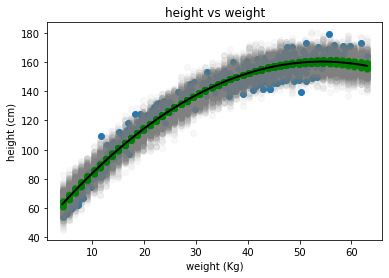

In [7]:
#plotting the average results 
x_range = np.linspace(min(data.weight), max(data.weight))
mean_prediction = post_mean[0] + post_mean[1] * x_range + post_mean[2] * x_range**2

plt.plot(x_range + mean_weight , mean_prediction, lw = 2, color = 'black')
plt.scatter(data.weight + mean_weight, data.height)
plt.title('height vs weight')
plt.ylabel('height (cm)')
plt.xlabel('weight (Kg)')

prediction_range = []
#sampling from the posterior to get a predictive interval
for x_ in (x_range):
    prediction_range.append(posterior_samples_quadratic[:500,0] + posterior_samples_quadratic[:500,1] * x_ + posterior_samples_quadratic[:500,2] * x_**2)  

prediction_range_noise = []

#sampling from the posterior to get a predictive interval
for x_ in (x_range):
    pred_mean_data = posterior_samples_quadratic[:500,0] + posterior_samples_quadratic[:500,1] * x_ + posterior_samples_quadratic[:500,2] * x_**2
    prediction_range_noise.append(norm.rvs( pred_mean_data,  posterior_samples_quadratic[:500,3]))  
    
# Plotting the uncertainty
for i,x_ in enumerate(x_range): 
    plt.scatter(np.repeat(x_,500) + mean_weight, prediction_range_noise[i], alpha = 0.05, color = 'grey')
for i,x_ in enumerate(x_range): 
    plt.scatter(np.repeat(x_,500) + mean_weight, prediction_range[i], alpha = 0.05, color = 'green')


plt.show()

# Exercise 2 (Statistical Rethinking, McElreath et al, Chapter 5)


In [8]:
data = pd.read_csv('milk_clean.csv',sep=',')
print(data.columns)

Index(['Unnamed: 0', 'clade', 'species', 'kcal.per.g', 'perc.fat',
       'perc.protein', 'perc.lactose', 'mass', 'neocortex.perc'],
      dtype='object')



**1) Analyze the relationship of milk energy with respect to percentage fat and percentage lactose through two independent linear regressions. Comment.**

/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -12.59486627496689
 hess_inv: array([[ 1.00288174e-05, -2.24598038e-06, -4.80064458e-06],
       [-2.24598038e-06,  6.21288184e-07,  1.35020895e-06],
       [-4.80064458e-06,  1.35020895e-06,  1.92844992e-04]])
      jac: array([1.43051147e-06, 7.92741776e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 309
      nit: 34
     njev: 73
   status: 2
  success: False
        x: array([0.28355424, 0.01037318, 0.0789585 ])
               mean        SD      7.5%     92.5%
a_fat      0.283376  0.003290  0.278680  0.288080
b_fat      0.010414  0.000812  0.009254  0.011566
sigma_fat  0.079751  0.013984  0.059779  0.099617


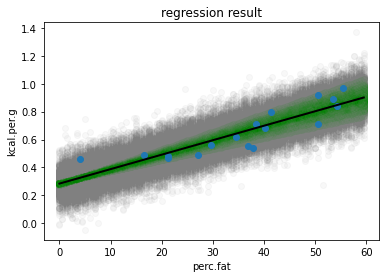

In [10]:
expr = 'kcal.per.g ~ perc.fat'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_fat_mean = 0
prior_b_fat_sigma = 1
prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_fat, prior_sigma]

solution_regression_fat = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression_fat, ['a_fat','b_fat','sigma_fat'])
posterior_plot_univariate_regression(solution_regression_fat, np.arange(0,60,0.5), data, names = ['perc.fat','kcal.per.g'])

/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -16.952333054023686
 hess_inv: array([[ 2.60792173e-03, -5.03225978e-05, -4.33401594e-05],
       [-5.03225978e-05,  1.05475295e-06,  9.73639004e-07],
       [-4.33401594e-05,  9.73639004e-07,  1.04607440e-04]])
      jac: array([0.00184345, 0.10211945, 0.00063324])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 322
      nit: 33
     njev: 77
   status: 2
  success: False
        x: array([ 1.22277802, -0.01185231,  0.0610969 ])
                mean        SD      7.5%     92.5%
a_lact      1.223717  0.050881  1.152507  1.297613
c_lact     -0.011880  0.001020 -0.013350 -0.010376
sigma_lact  0.060696  0.010219  0.046049  0.075436


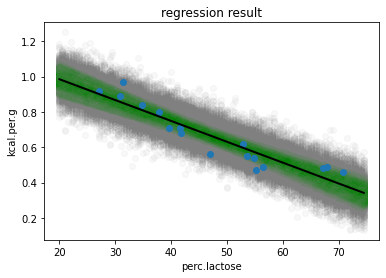

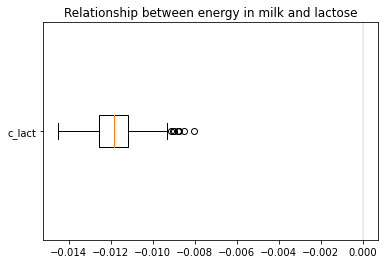

In [11]:
expr = 'kcal.per.g ~ perc.lactose'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_c_lact_mean = 0
prior_c_lact_sigma = 1
prior_c_lact = ['gaussian', [prior_c_lact_mean, prior_c_lact_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_c_lact, prior_sigma]

solution_regression_lact = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression_lact, ['a_lact','c_lact','sigma_lact'])
posterior_plot_univariate_regression(solution_regression_lact, np.arange(20,75,0.5), data, names = ['perc.lactose','kcal.per.g'])

posterior_samples = post_sample_Laplace(solution_regression_lact, 1000)

boxes = []
boxes.append(posterior_samples[:,1])

plt.figure()
plt.boxplot(boxes,vert=0)
plt.yticks([1], ['c_lact'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Relationship between energy in milk and lactose')
plt.show()

We see that in both cases, these two variables seem to be good predictors of the energy per gramm. 
It is interesting to notice that the posterior means for perc.fat and perc.lactose seem to be mirror images of one another. We see that b_fat = 0.01 while b_lact = -0.01. Moreover the 85% posterior interval for b_fat is [0.008, 0.012], while the one for b_lact is [-0.013, -0.010], both these intervals lying entirely on one side or the other of zero.

Given the strong association of the two variables with the outcome, we might conclude that both variables are reliable predictors of the total energy in milk across species. The more fat, the more kilocalories in milk, and the more lactose the fewer kilocalories in milk. This observation naturally leads to the following question:

**2) What happens if we regress kcal.per.g with respect to both perc.fat and perc.lactose ?**

/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/ibalelli/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -16.233559427808984
 hess_inv: array([[ 4.15444799e-02, -4.41135150e-04, -5.21542049e-04,
        -4.53425625e-05],
       [-4.41135150e-04,  4.96218879e-06,  5.32682502e-06,
         3.96271229e-07],
       [-5.21542049e-04,  5.32682502e-06,  6.78012932e-06,
         6.37349224e-07],
       [-4.53425625e-05,  3.96271229e-07,  6.37349224e-07,
         1.00325793e-04]])
      jac: array([ 3.48091125e-05,  2.41041183e-04,  2.74181366e-03, -6.05583191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 512
      nit: 45
     njev: 98
   status: 2
  success: False
        x: array([ 1.07911023,  0.00171469, -0.01013612,  0.06038505])
            mean        SD      7.5%     92.5%
a       1.076077  0.208415  0.777539  1.369761
b_fat   0.001688  0.002266 -0.001468  0.005011
c_lact -0.010063  0.002672 -0.013933 -0.006182
sigma   0.060696  0.009907  0.046514  0.074793


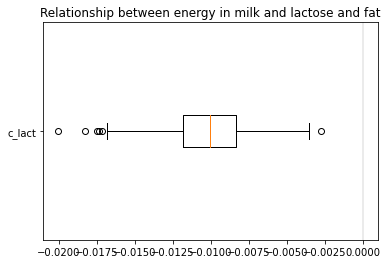

In [12]:
expr = 'kcal.per.g ~ perc.fat + perc.lactose'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_fat_mean = 0
prior_b_fat_sigma = 1
prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

prior_c_lact_mean = 0
prior_c_lact_sigma = 1
prior_c_lact = ['gaussian', [prior_c_lact_mean, prior_c_lact_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_fat, prior_c_lact, prior_sigma]

solution_regression = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression, ['a','b_fat', 'c_lact', 'sigma'])

posterior_samples = post_sample_Laplace(solution_regression, 1000)

boxes = []
boxes.append(posterior_samples[:,2])

plt.figure()
plt.boxplot(boxes,vert=0)
plt.yticks([1], ['c_lact'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Relationship between energy in milk and lactose and fat')
plt.show()

We observe that the posterior means for both b_fat and c_lact are closer to zero, and their standard deviation is twice as large as in their respective bivariate model. The effect is much bigger for b_fat whose posterior mean is essentially zero, with a value of b_fat which has decreased of an order of magnitude, and a posterior interval covering both negative and positive values ([-0.002, 0.005]). Concerning c_lact, the tendency of the posterior mean to be closer to zero can be seen through the comparison of the two box-plots above. We see that the uncertainty is twice bigger and the median value has been slightly shifted towards zero. However, the posterior interval doesn't cross zero and despite this effect, c_lact remains a predictor able to explain the data.

**3) Can you explain the differences observed between the results of questions 1 and 2 ?**

The main reason of what we observed earlier is that perc.fat and perc.lactose contain pretty much the same information. They are substitutes for one another.

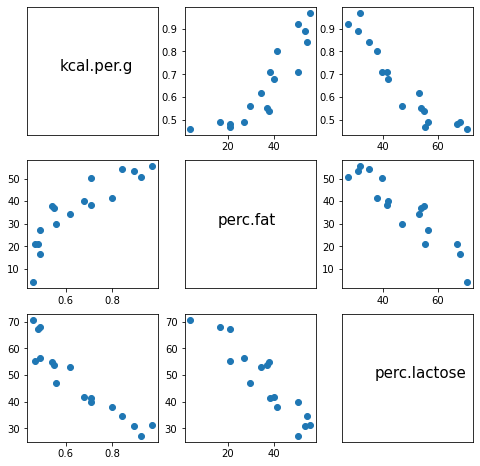

In [13]:
fields = ['kcal.per.g', 'perc.fat', 'perc.lactose']

plt.figure(figsize=(8,8))

for i, field in enumerate(fields):
    
    for j in range(len(fields)):
    
        plt.subplot(len(fields), len(fields), len(fields)*i + j + 1)
        
        if i==j:
            plt.text(0.25,0.5, field, fontsize=15)
            plt.xticks([])
            plt.yticks([])
        else:
            plt.scatter(data[fields[j]],data[field])

The plot above proposes to visualize how the different variables are related to each other. In each scatterplot off the diagonal, the vertical axis variable is the variable labeled on the same row and the horizontal axis is the variable labeled on the same column.

What is striking here is the strong correlation between perc.fat and perc.lactose. The points line up almost perfectly on a straight line. They are negatively correlated and so strongly that they are almost redundant.

In [14]:
from scipy.stats import pearsonr

pearsonr(data['perc.fat'], data['perc.lactose'])[0]

-0.9246954581668915

We find a correlation coefficient of -0.92 between the two variables, indicating an almost negative-linear relationship between them. So finally, when we feed the model with these two variables, we're giving him redundant information, and the posterior distribution ends up describing multiple combinations of b_fat and c_lact that are equally plausible to describe the data, thus increasing the standard deviation of these two variables as we saw before. 

The strong predictive power of perc.fat in question 1 was only due to its strong correlation with perc.lact. Indeed in question 2 when we model the data with both variables, the model tells us that it only needs the perc.lact to explain the data. The effect of perc.lact is removed from perc.fat and we see that what's remaining has no impact on the prediction.

**4) Study the effect of correlation between predictors**

To answer this question you will create a dummy variable whose correlation with perc.fat varies. Then you will fit many linear regressions (let's say 10) using these two variables and observe the effect on the mean standard deviation of b_fat.

In [ ]:
corr = np.linspace(0., 0.99, 10)
print(corr)
std_err_list = []

for coeff in corr:
    data['x'] = np.random.normal(loc=coeff*np.mean(data['perc.fat']), scale=np.sqrt((1-coeff**2))*np.std(data['perc.fat']), size=data['perc.fat'].shape)
    
    temp_list = []
    
    for i in range(1000):
    
        expr = 'kcal.per.g ~ perc.fat + x'

        # Initializing the likelihood
        likelihood = 'gaussian'

        # Defining the prior with hyperparameters 
        prior_a_mean = 0.5
        prior_a_sigma = 10
        prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

        prior_b_fat_mean = 0
        prior_b_fat_sigma = 1
        prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

        prior_c_mean = 0
        prior_c_sigma = 1
        prior_c = ['gaussian', [prior_c_mean, prior_c_sigma]]

        sigma_inf = 0
        sigma_sup = 10
        prior_sigma_unif = [sigma_inf, sigma_sup]
        prior_sigma = ['uniform', prior_sigma_unif]

        priors = [prior_a, prior_b_fat, prior_c, prior_sigma]

        solution_regression = laplace_solution_regression(expr, data, likelihood, priors)

        posterior_samples = post_sample_Laplace(solution_regression, 500)
        temp_list.append(np.std(posterior_samples[:,1]))
        
    std_err_list.append(np.mean(temp_list))

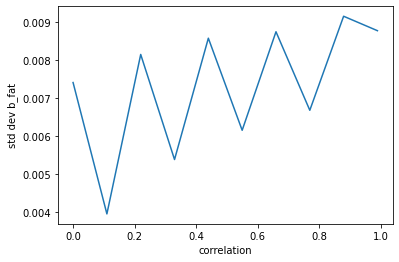

In [16]:
plt.figure()
plt.plot(corr, std_err_list)
plt.xlabel('correlation')
plt.ylabel('std dev b_fat')
plt.show()

We plotted above the evolution of the standard deviation of the posterior. We observe that when the two variables are uncorrelated, the standard deviation of the plot is small. This means that the posterior is piled up a narrow range of values. As the correlation increases, the standard deviation inflates in a non-linear way and grows very rapidly when we approach 1. Yet, what we did here was just adding random numbers through the x variable that don't mean anything. However, this dummy variable brings some sort of redundancy when its correlation with perc.fat becomes too strong, thus pushing the model to be more uncertain about perc.fat as it has now more "possibilities" to explain the data.

# Exercise 3 (Laplace approximation)

In this exercise we will show how to use the Laplace approximation by deriving the equations on an example.

Consider a random variable $\theta$ following a uniform distribution on [0, 1]. Let's consider a dummy experiment in which two outcomes are possible (success and failure). The experiment is made n times with k successes. The experiments are independent from each other. The probability of success is given by $\theta$. We will denote by y the random variable describing the number of successes. 

**1) Write the data likelihood and the posterior distribution $p(\theta|y)$ (up to constant).**

We can consider that given $\theta$, y follows a binomial distribution. Therefore the data likelihood is:

$$
   p(y|\theta) = \binom{n}{k}\theta^{k}(1-\theta)^{n-k}.
$$
   
This is also proportional to the posterior distribution $p(\theta|y)$ as $\theta$ is given a uniform prior on [0, 1].

**2) Estimate the posterior distribution $p(\theta|y)$ using the Laplace approximation. You will derive the computations yourself.**

For any probability density function (pdf) that is smooth and well-peaked around its point of maxima, Laplace proposed to approximate it by a normal pdf. To do so he used a 2-term Taylor expansion trick around the local maxima of the log-pdf. Let denote $g(\theta) = \log p(\theta|y)$ and $\theta_0$ its maximum.

Following the Taylor expansion we can write:
$$
g(\theta) = g(\theta_0) + g'(\theta_0)(\theta - \theta_0) + \frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2.
$$

We know g reaches a local maxima in $\theta_0$, therefore $g'(\theta_0)$ and :

$$
g(\theta) = g(\theta_0) + \frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2.
$$

If we exponentiate this epxression we obtain :

$$
\exp (g(\theta)) = p(\theta|y) = \exp(g(\theta_0)) exp(\frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2).
$$

This can be identified to a Gaussian with mean $\theta_0$ and variance $-\frac{1}{g''(\theta_0)}$.

As a result we need to compute the derivative of $g(\theta)$ and find the point $\theta_0$ that cancels it.
We obtain :

$$
g'(\theta) = \frac{k}{\theta} - \frac{n-k}{1-\theta}.
$$

And $\theta_0 = \frac{k}{n}$.

Now for the second order derivative we have :

$$
g''(\theta) = -\frac{k}{\theta^{2}} - \frac{n-k}{(1-\theta)^{2}}.
$$

The second order derivative in $\theta_0$ is $g''(\theta_0) = -\frac{n^3}{k(n-k)}$ which gives us a variance $\frac{k(n-k)}{n^3}$.

**3) Plot the posterior pdf of $\theta$ obtained with the Laplace approximation and the true posterior.**


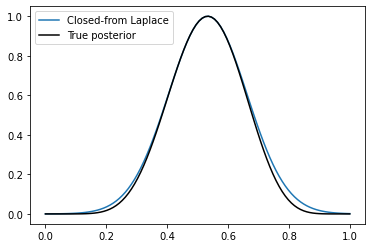

In [17]:
k = 8
n = 15

xs = np.linspace(0., 1., 100)

analytical_mean = float(k) / float(n)
analytical_sigma = np.sqrt((k*(n-k))/n**3)

plt.figure()
plt.plot(xs, norm.pdf(xs, loc=analytical_mean, scale=analytical_sigma)/np.max(norm.pdf(xs, loc=analytical_mean, scale=analytical_sigma)), label='Closed-from Laplace')
plt.plot(xs, binom.pmf(k=k, n=n, p=xs)/np.max(binom.pmf(k=k, n=n, p=xs)), label='True posterior', color='black')
plt.legend()
plt.show()